In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import eigs           

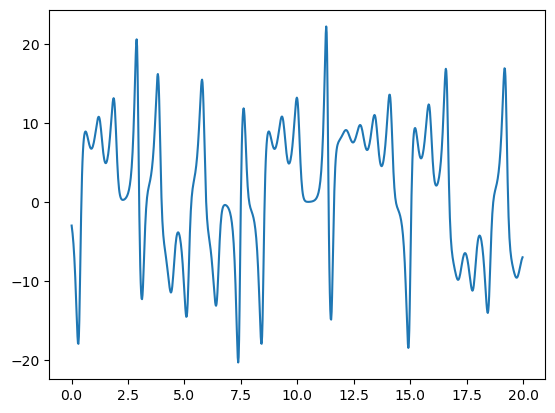

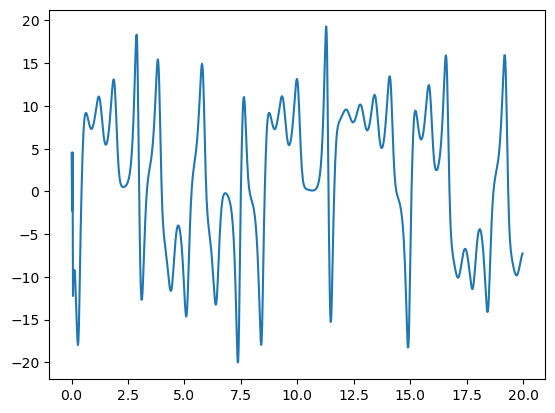

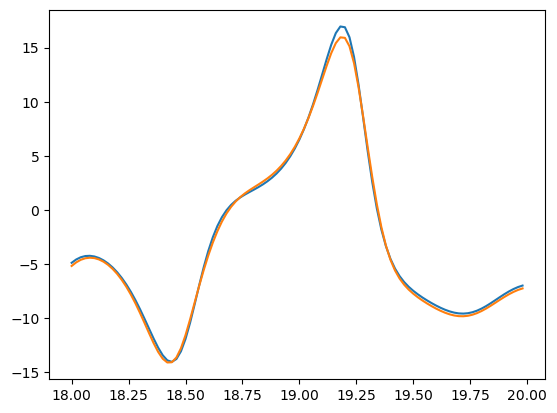

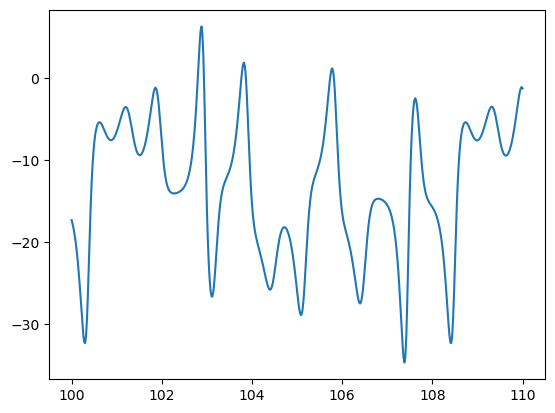

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


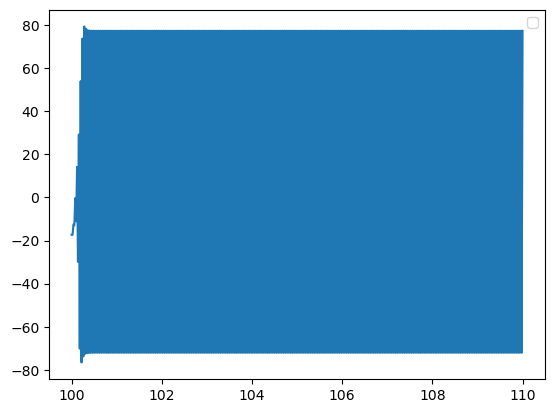

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


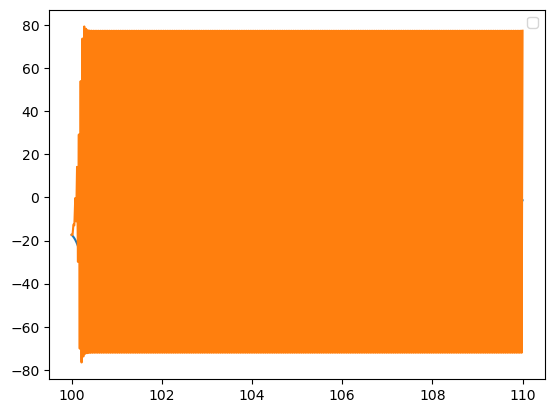

In [2]:
par = np.array([10, 28, 2.66667])

dt = 0.02
tf = 100
nt = int(tf/dt + 1)
t = np.linspace(0, tf, nt)

x = np.zeros((3, nt))
x0 = np.array([-2.9708, -5.1844, 12.1317])
x[:, 0] = x0
n = 300    # Number of neurons
m = 3       # Input dimension

Win = np.random.uniform(-0.01, 0.01, [n, m])      # Weights connected from m inputs to n neurons

A = np.zeros((n, n))        # Adjacency matrix of n neurons in reservoir
for i in np.arange(n):
    for j in np.arange(n):
        temp = np.random.randint(0, n)
        if temp < 6 :
            A[i, j] = np.random.uniform(-0.5, 0.5)

spec = max(abs(eigs(A, v0 = np.ones(n))[0]))
A = (A/spec)


# A = sp.random(n, n, density=6/n, format='csr')
# A = A - 0.5 * np.sign(A.toarray())
# A = A * 1.2 / np.abs(sp.linalg.eigs(A, k=1)[0])  # normalize reservoir matrix
# A = sp.csr_matrix(A)

# Win = 0.01 * (2.0 * np.random.rand(n, m) - 1)



r = np.zeros((n, nt))
r[:, 0] = np.random.uniform(-0.5, 0.05, n)

#### Evolution

for i in np.arange(nt - 1):
    x[0, i + 1] = x[0, i] + dt * (par[0] * (x[1, i] - x[0, i]))
    x[1, i + 1] = x[1, i] + dt * (x[0, i] * (par[1] - x[2, i]) - x[1, i])
    x[2, i + 1] = x[2, i] + dt * (x[0, i] * x[1, i] - par[2] * x[2, i])

    r[:, i + 1] = np.tanh(A.dot(r[:, i]) + np.matmul(Win, x[:, i]) + np.ones(n))

yt = x
l = 10^(-6)

Wout = np.zeros((n, n))
Wout = np.matmul(r, np.transpose(r))
Wout = np.linalg.inv(Wout + l*np.identity(n))
Wout = np.matmul(Wout, r)
Wout = np.matmul(Wout, np.transpose(yt))
Wout = np.transpose(Wout)

ypred = np.matmul(Wout, r)

plt.plot(t[0 : 1000], x[0, 0 : 1000])
plt.show()
plt.plot(t[0 : 1000], ypred[0, 0 : 1000])
plt.show()
plt.plot(t[900 : 1000], x[0, 900 : 1000])
plt.plot(t[900 : 1000], ypred[0, 900: 1000])
plt.show()
tf_test = 110
nt_test = int((tf_test - tf)/dt + 1)
t_test = np.linspace(tf, tf_test, nt_test)

x_test = np.zeros((3, nt_test))
x_test[:, 0] = np.matmul(Wout, r[:, -1])

ypred_test = np.zeros((3, nt_test))
ypred_test[:, 0] = np.matmul(Wout, r[:, -1])
r_test = np.zeros((n, nt_test))
r_test[:, 0] = r[:, -2]


for i in np.arange(nt_test - 1):
    x_test[0, i + 1] = x_test[0, i] + dt * (par[0] * (x[1, i] - x[0, i]))
    x_test[1, i + 1] = x_test[1, i] + dt * (x[0, i] * (par[1] - x[2, i]) - x[1, i])
    x_test[2, i + 1] = x_test[2, i] + dt * (x[0, i] * x[1, i] - par[2] * x[2, i])

    r_test[:, i + 1] = np.tanh(A.dot(r_test[:, i]) + np.matmul(Win, ypred_test[:, i]) + np.ones(n))
    ypred_test[:, i + 1] = np.matmul(Wout, r_test[:, i + 1])

plt.plot(t_test[0:1000], x_test[0, 0:1000])
plt.show()
plt.plot(t_test[0:1000], ypred_test[0, 0:1000])
plt.legend()
plt.show()
plt.plot(t_test[0:1000], x_test[0, 0:1000])
plt.plot(t_test[0:1000], ypred_test[0, 0:1000])
plt.legend()
plt.show()

In [5]:
Wout.shape

(3, 300)

In [3]:
nt

5001

In [4]:
x[:, 4999]

array([-17.3207817 , -18.77841648,  38.77144311])